In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [3]:
housing_data = pd.read_csv("weekly_housing_market_data_most_recent.tsv000", sep='\t')
housing_data.head(10)

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,average_adjustment_average_homes_sold,adjusted_average_homes_sold,average_adjustment_average_new_listings,adjusted_average_new_listings,average_adjustment_pending_sales,adjusted_pending_sales,adjusted_average_homes_delisted_yoy,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
0,1229,5,"Woodford County, KY",county,2018-05-28,2018-06-24,4 weeks,34.0,0.000000,8.0,...,NaN,8.0,NaN,9.0,NaN,6.0,-0.5,0.000000,-0.250000,-0.250000
1,18500,-2,"Corning, NY metro area",metro,2020-07-27,2020-08-23,4 weeks,35.0,-0.078947,8.0,...,NaN,8.0,NaN,11.0,NaN,4.0,0.0,-0.111111,-0.266667,0.000000
2,2652,5,"Bee County, TX",county,2019-09-09,2019-10-06,4 weeks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24420,-2,"Grants Pass, OR metro area",metro,2017-04-17,2017-05-14,4 weeks,106.0,-0.027523,26.0,...,NaN,26.0,NaN,31.0,NaN,12.0,-0.5,-0.037037,0.000000,0.090909
4,24420,-2,"Grants Pass, OR metro area",metro,2021-03-22,2021-04-18,4 weeks,91.0,0.123457,22.0,...,NaN,22.0,NaN,26.0,NaN,22.0,0.0,0.100000,0.368421,0.833333
5,3008,5,"Prince George County, VA",county,2020-01-20,2020-02-16,4 weeks,29.0,0.380952,7.0,...,NaN,7.0,NaN,6.0,NaN,7.0,0.0,0.400000,-0.250000,0.750000
6,1709,5,"Washington County, MO",county,2018-03-19,2018-04-15,4 weeks,8.0,0.000000,2.0,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,0.000000,-0.333333,NaN
7,46500,-2,"Urbana, OH metro area",metro,2017-03-27,2017-04-23,4 weeks,23.0,-0.530612,5.0,...,NaN,5.0,NaN,5.0,NaN,3.0,-0.5,-0.583333,-0.500000,-0.250000
8,1972,5,"Monroe County, NY",county,2020-07-27,2020-08-23,4 weeks,879.0,-0.133990,219.0,...,NaN,219.0,NaN,247.0,NaN,211.0,-0.3,-0.134387,-0.015936,0.104712
9,1969,5,"Lewis County, NY",county,2020-03-09,2020-04-05,4 weeks,13.0,1.166667,3.0,...,NaN,3.0,NaN,5.0,NaN,1.0,0.0,0.500000,0.250000,0.000000


## Missing Values

In [4]:
# percentage of missing values
housing_data.isnull().sum().sum() / housing_data.size

0.27593702378029406

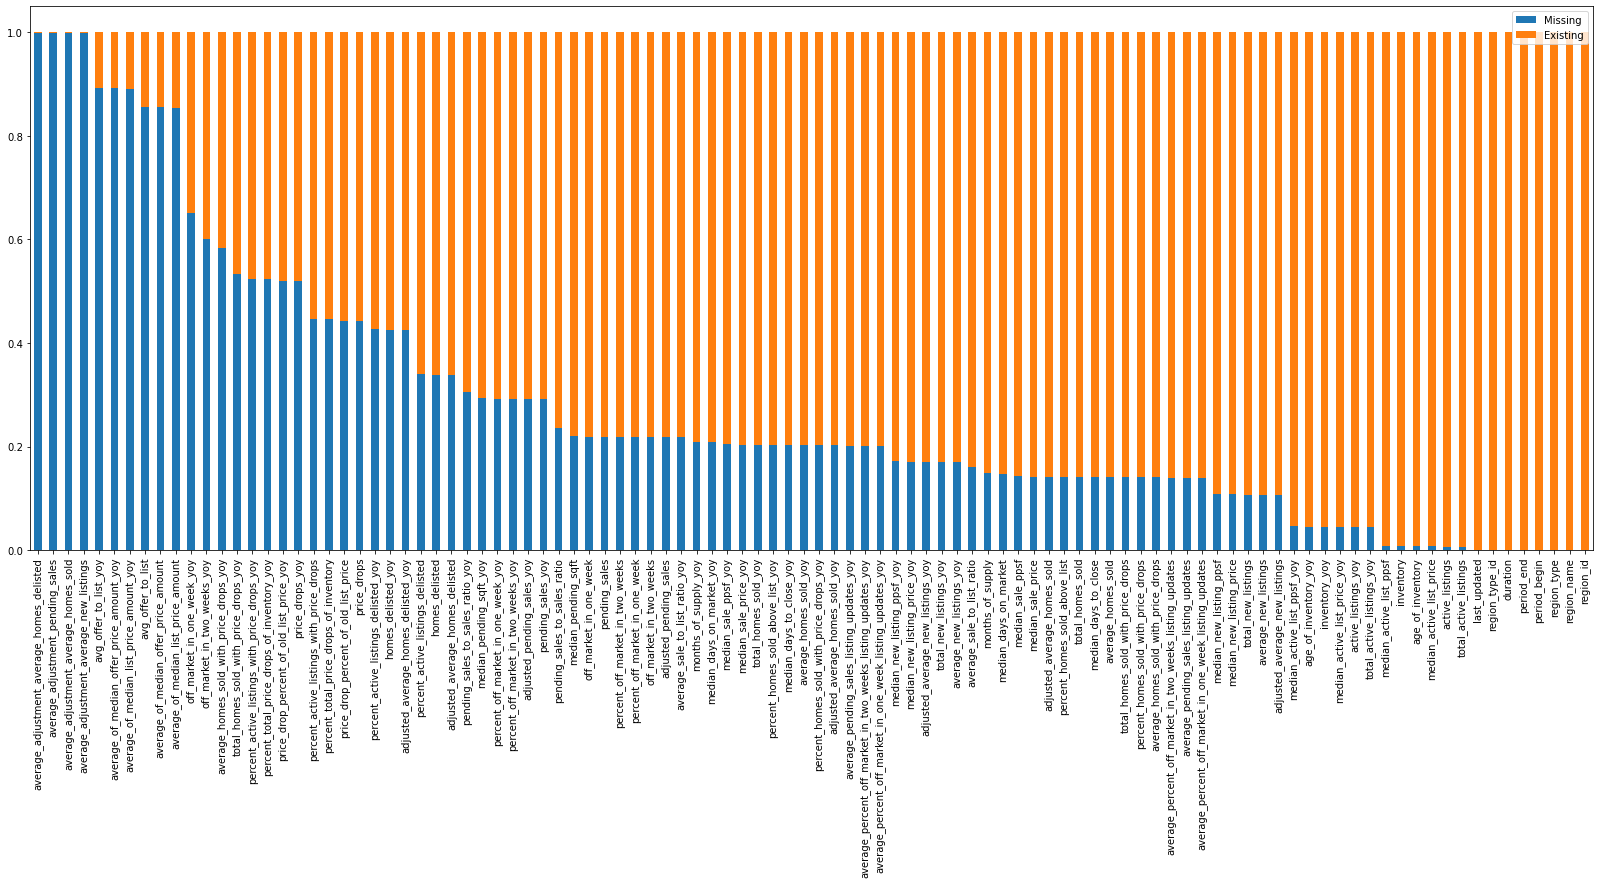

In [83]:
missing_nums = (housing_data.isnull().sum().sort_values(ascending=False))
missing_ratios = missing_nums / housing_data.shape[0]
# missing_nums.plot.bar()
existing_ratios = 1 - missing_ratios
df = pd.concat([missing_ratios, existing_ratios], axis=1)
df.plot.bar(stacked=True, figsize=(28, 10))
plt.legend(labels=['Missing', 'Existing'])

In [5]:
# drop columns
processed_data = housing_data.copy()
for n in processed_data.columns:
    missing_num = processed_data[n].isnull().sum()
    if missing_num > len(processed_data)/3:
        processed_data = processed_data.drop(labels=n, axis=1)
processed_data.shape

(2520360, 74)

In [6]:
# drop rows
processed_data = processed_data.dropna(thresh=37)
processed_data.shape

(2146802, 74)

In [7]:
# drop non-numerical colums
# isNumeric_lst = dropped_data.select_dtypes(include=np.number).columns.tolist()
# dropped_data = dropped_data[isNumeric_lst]
processed_data = processed_data.drop(
    labels=["region_name", "region_type", "period_begin", "period_end", "duration", "last_updated"], axis=1)
processed_data.head()


,region_id,region_type_id,total_homes_sold,total_homes_sold_yoy,average_homes_sold,average_homes_sold_yoy,total_homes_sold_with_price_drops,average_homes_sold_with_price_drops,percent_homes_sold_with_price_drops,percent_homes_sold_with_price_drops_yoy,...,average_percent_off_market_in_two_weeks_listing_updates,average_percent_off_market_in_two_weeks_listing_updates_yoy,percent_homes_sold_above_list,percent_homes_sold_above_list_yoy,adjusted_average_homes_sold,adjusted_average_new_listings,adjusted_pending_sales,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
0,1229,5,34.0,0.000000,8.0,0.000000,8.0,2.0,0.162500,0.037392,...,0.317399,-0.252045,0.172917,0.006142,8.0,9.0,6.0,0.000000,-0.250000,-0.250000
1,18500,-2,35.0,-0.078947,8.0,-0.111111,0.0,0.0,0.000000,0.000000,...,0.000000,-0.050000,0.143750,-0.004383,8.0,11.0,4.0,-0.111111,-0.266667,0.000000
3,24420,-2,106.0,-0.027523,26.0,-0.037037,0.0,0.0,0.000000,0.000000,...,0.000000,-0.008065,0.187054,0.000570,26.0,31.0,12.0,-0.037037,0.000000,0.090909
4,24420,-2,91.0,0.123457,22.0,0.100000,2.0,0.0,0.026070,0.026070,...,0.560325,0.560325,0.361117,0.087118,22.0,26.0,22.0,0.100000,0.368421,0.833333
5,3008,5,29.0,0.380952,7.0,0.400000,13.0,3.0,0.454167,-0.031944,...,0.292582,0.042582,0.237500,0.056944,7.0,6.0,7.0,0.400000,-0.250000,0.750000


## Correlation & Coefficient

In [8]:
correlation = processed_data.corr()
correlation_rankings = correlation['median_sale_price'].sort_values(
    ascending=False)
corr_top_5 = correlation_rankings[0:5]

In [9]:
# the median_sale_price is our target, so we drop every row that has a null value in that column
processed_data.dropna(subset=['median_sale_price'], inplace=True)

In [10]:
covariates = processed_data.cov()
covariates_ranking = covariates['median_sale_price'].abs().sort_values(ascending=False)
cr_top5 = covariates_ranking[1:5]
cr_last10 = covariates_ranking[-10:]

<AxesSubplot:>

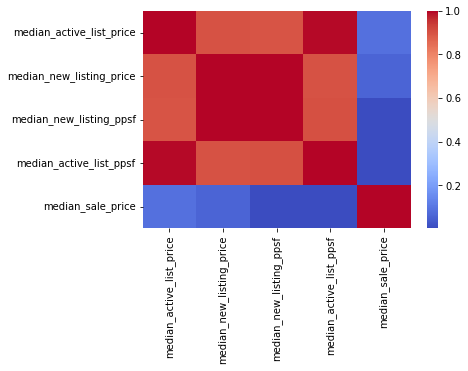

In [89]:
heatmap_keys = list(cr_top5.keys())
heatmap_keys.append('median_sale_price')
heatmap_df = correlation.loc[heatmap_keys, heatmap_keys]
sns.heatmap(heatmap_df, cmap='coolwarm')

In [11]:
for n in cr_top5.keys():
    if n == 'median_sale_price':
        continue
    processed_data.drop(labels=n, inplace=True, axis=1)


In [12]:
for n in cr_last10.keys():
    processed_data.drop(labels=n, inplace=True, axis=1)

In [13]:
processed_data = processed_data.groupby('region_id').apply(lambda x:x.fillna(x.mean()))
for n in processed_data.columns:
    mean = processed_data[n].mean()
    processed_data.fillna(value=mean, inplace=True)

processed_data.head()

,region_id,region_type_id,total_homes_sold,total_homes_sold_yoy,average_homes_sold,average_homes_sold_yoy,total_homes_sold_with_price_drops,average_homes_sold_with_price_drops,percent_homes_sold_with_price_drops,median_sale_price,...,average_pending_sales_listing_updates_yoy,average_percent_off_market_in_one_week_listing_updates,average_percent_off_market_in_two_weeks_listing_updates,percent_homes_sold_above_list,adjusted_average_homes_sold,adjusted_average_new_listings,adjusted_pending_sales,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
0,1229,5,34.0,0.000000,8.0,0.000000,8.0,2.0,0.162500,223225.0,...,-0.111111,0.289621,0.317399,0.172917,8.0,9.0,6.0,0.000000,-0.250000,-0.250000
1,18500,-2,35.0,-0.078947,8.0,-0.111111,0.0,0.0,0.000000,100468.1,...,-0.111111,0.000000,0.000000,0.143750,8.0,11.0,4.0,-0.111111,-0.266667,0.000000
3,24420,-2,106.0,-0.027523,26.0,-0.037037,0.0,0.0,0.000000,260625.0,...,-0.038462,0.000000,0.000000,0.187054,26.0,31.0,12.0,-0.037037,0.000000,0.090909
4,24420,-2,91.0,0.123457,22.0,0.100000,2.0,0.0,0.026070,371437.5,...,0.684211,0.399019,0.560325,0.361117,22.0,26.0,22.0,0.100000,0.368421,0.833333
5,3008,5,29.0,0.380952,7.0,0.400000,13.0,3.0,0.454167,234975.0,...,0.285714,0.192995,0.292582,0.237500,7.0,6.0,7.0,0.400000,-0.250000,0.750000


## Skewness

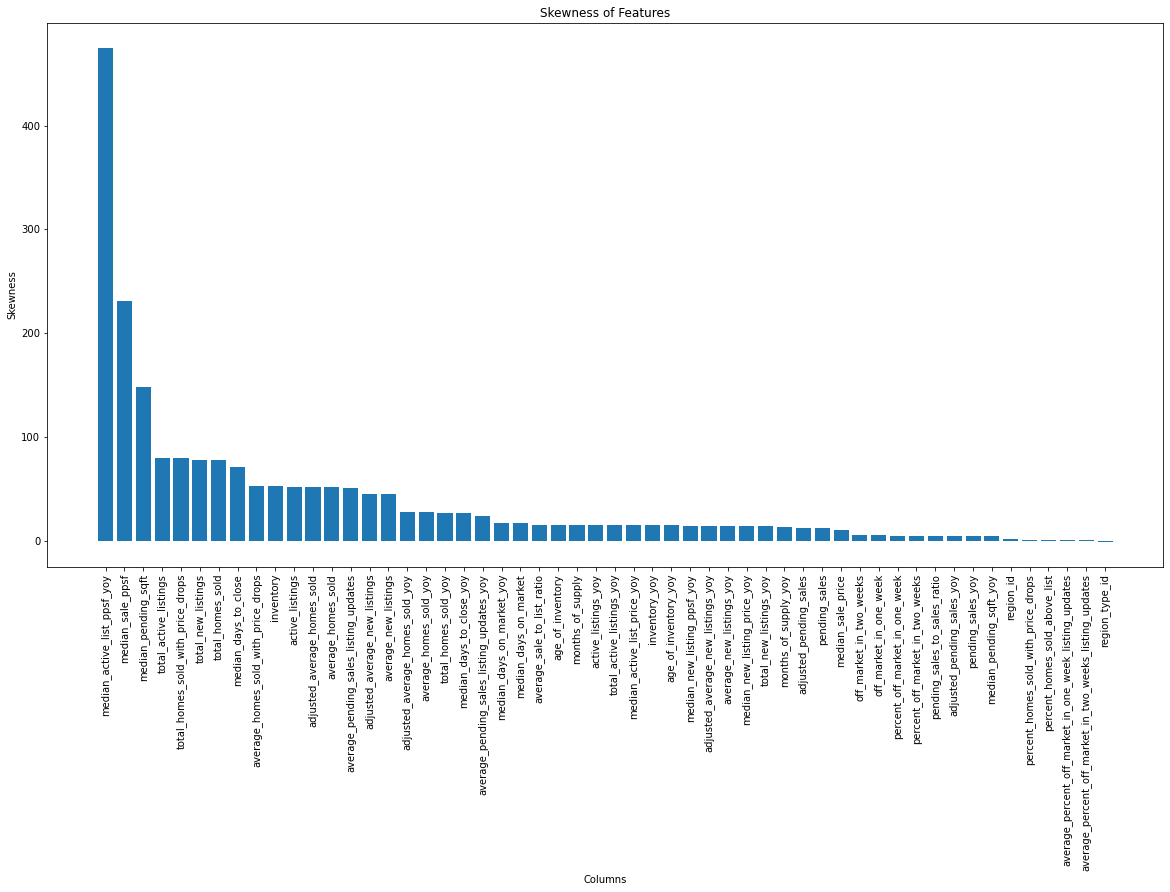

In [100]:
skewness_values = processed_data.skew().sort_values(ascending=False)

fig = plt.figure(figsize=(20, 10))
plt.bar(skewness_values.index, skewness_values)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Features')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [101]:
# log transformation on the whole dataset
log_on_whole = processed_data.copy().apply(lambda x: x - x.min() + 1)
log_on_whole = np.log(log_on_whole)
log_on_whole.skew().sort_values(ascending=False)

average_sale_to_list_ratio                                 15.731502
median_active_list_ppsf_yoy                                14.302947
median_active_list_price_yoy                               13.913804
months_of_supply_yoy                                       12.772810
median_new_listing_ppsf_yoy                                12.446613
median_new_listing_price_yoy                               12.185382
adjusted_average_homes_sold_yoy                            11.676473
average_homes_sold_yoy                                     11.676313
average_pending_sales_listing_updates_yoy                  11.191533
age_of_inventory_yoy                                       11.123474
adjusted_average_new_listings_yoy                          10.421513
average_new_listings_yoy                                   10.421498
active_listings_yoy                                         9.793338
inventory_yoy                                               9.791490
total_active_listings_yoy         

In [102]:
#log transformation on only > 1 skewness features
# transformed_data = processed_data[skewness_values[skewness_values.abs() > 1].index]
# transformed_data = transformed_data.apply(lambda x: x - x.min() + 1)
# transformed_data = np.log(transformed_data)
# log_on_greater_than_1 = processed_data.update(transformed_data)

## Kurtosis

In [ ]:
kurtosis_values = processed_data.kurtosis().sort_values(ascending=False)

fig = plt.figure(figsize=(20, 10))
plt.bar(kurtosis_values.index, kurtosis_values)
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Features')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# Comparison to a normal distribution: 
# The kurtosis of a normal distribution is 3. 
# So, a kurtosis value higher than 3 indicates heavier tails and a sharper peak compared to a normal distribution. 
# Values significantly higher than 3 may suggest a more extreme departure from normality.

In [15]:
high_kurtosis_values_index = kurtosis_values[kurtosis_values > 3].index
processed_data[high_kurtosis_values_index]

,median_active_list_ppsf_yoy,median_sale_ppsf,median_pending_sqft,median_days_to_close,total_active_listings,total_homes_sold_with_price_drops,total_new_listings,total_homes_sold,average_homes_sold_with_price_drops,inventory,...,total_new_listings_yoy,months_of_supply_yoy,off_market_in_two_weeks,off_market_in_one_week,percent_off_market_in_one_week,percent_off_market_in_two_weeks,pending_sales_to_sales_ratio,adjusted_pending_sales_yoy,pending_sales_yoy,median_pending_sqft_yoy
0,0.030643,107.647632,2043.2,34.6,263.0,8.0,38.0,34.0,2.0,57.0,...,-0.240000,-1.069318,2.0,2.0,0.370833,0.370833,0.806548,-0.250000,-0.250000,-0.103584
1,0.029584,63.480390,1722.7,0.0,940.0,0.0,47.0,35.0,0.0,225.0,...,-0.229508,-4.391423,0.0,0.0,0.062500,0.062500,0.550000,0.000000,0.000000,0.115233
3,0.142043,166.459990,1475.6,0.0,1767.0,0.0,124.0,106.0,0.0,420.0,...,-0.008000,-0.371507,0.0,0.0,0.019231,0.019231,0.479886,0.090909,0.090909,-0.098375
4,0.242450,220.476490,1665.2,40.3,534.0,2.0,106.0,91.0,0.0,106.0,...,0.341772,-12.021498,15.0,11.0,0.499756,0.688299,1.017328,0.833333,0.833333,0.156309
5,0.053421,114.125515,1644.1,38.3,270.0,13.0,27.0,29.0,3.0,58.0,...,-0.205882,-8.413889,4.0,2.0,0.369444,0.581481,1.100000,0.750000,0.750000,0.018776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520321,0.054956,113.180697,1705.0,0.0,8257.0,145.0,577.0,596.0,12.0,645.0,...,0.257081,-0.275481,5.0,3.0,0.121434,0.170109,0.628916,0.200000,0.200000,-0.004844
2520322,0.060151,91.192791,1797.1,0.0,1931.0,0.0,69.0,48.0,0.0,154.0,...,-0.158537,8.329444,0.0,0.0,0.000000,0.000000,0.688095,2.000000,2.000000,-0.056442
2520323,0.101780,242.294825,2165.8,23.3,10061.0,188.0,1365.0,973.0,15.0,746.0,...,-0.066347,-1.359797,35.0,27.0,0.395286,0.504029,0.908131,-0.089744,-0.089744,0.042754
2520332,0.329347,71.047319,1822.5,0.0,167.0,0.0,21.0,21.0,0.0,12.0,...,1.288122,0.822348,0.0,0.0,0.000000,0.030303,1.000000,0.427139,0.427139,0.020912


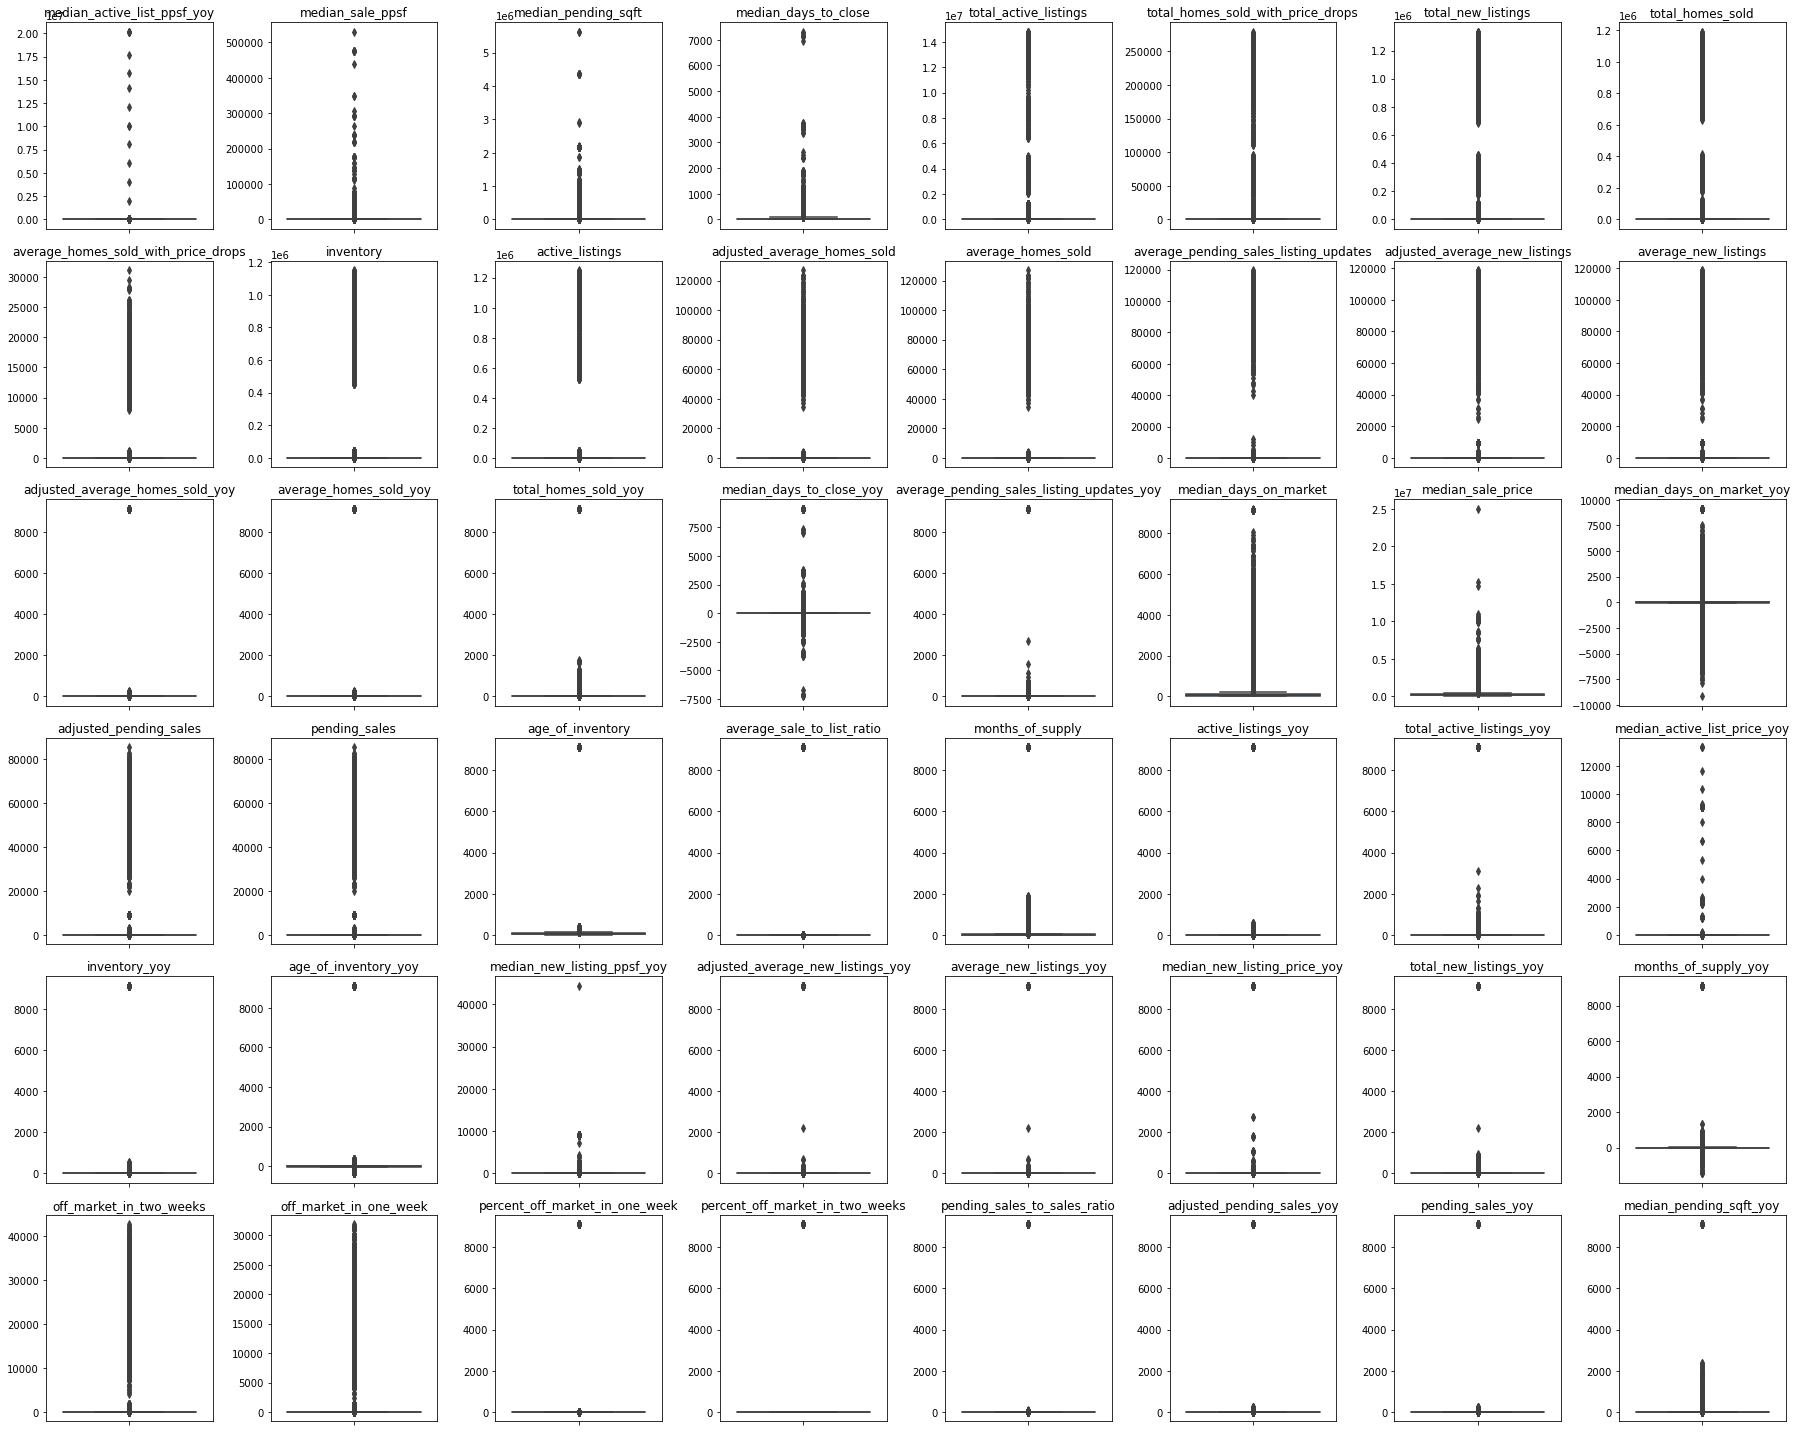

In [16]:
fig, subplots = plt.subplots(6, 8, figsize=(25, 20))
# for each column, plot the boxplot, and there are 32 columns in total
for i, col in enumerate(high_kurtosis_values_index):
    sns.boxplot(y=processed_data[col], ax=subplots[i//8, i % 8])
    subplots[i//8, i % 8].set_title(col)
    subplots[i//8, i % 8].set_ylabel('')
plt.tight_layout()
plt.show()

In [17]:
temp = processed_data['median_active_list_ppsf_yoy'].copy().values.reshape(-1, 1)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(temp[:1000])

: 

: 

In [144]:
outliers = temp[dbscan.labels_ == -1]
outlier_count = len(outliers)

0          0.030643
1          0.029584
3          0.142043
4          0.242450
5          0.053421
             ...   
2520321    0.054956
2520322    0.060151
2520323    0.101780
2520332    0.329347
2520352    0.219917
Name: median_active_list_ppsf_yoy, Length: 2133315, dtype: float64

## Prepare Dataset

In [ ]:
# features = processed_data.copy().drop(['median_sale_price'], axis=1)
# targets = processed_data['median_sale_price']
features = processed_data.drop(labels='median_sale_price', axis=1)
targets = processed_data['median_sale_price']

In [ ]:
feature_scaler = StandardScaler()
features = feature_scaler.fit_transform(features)
target_scaler = StandardScaler()
targets = target_scaler.fit_transform(targets.to_numpy().reshape(-1, 1))
features.shape, targets.shape

((2133315, 53), (2133315, 1))

In [ ]:
train_X, validation_X, train_Y, validation_Y = train_test_split(
    features, targets, test_size=0.3, random_state=42)
train_X.shape, train_Y.shape,  validation_X.shape, validation_Y.shape


((1493320, 53), (1493320, 1), (639995, 53), (639995, 1))

## Model


In [101]:
mse_train_lst, r2_train_lst = [], []
mse_val_lst, r2_val_lst = [], []
eval_num = 10


def performance(model, train_X, train_Y, validation_X, validation_Y):
    mse_train_tmp, r2_train_tmp = [], []
    mse_val_tmp, r2_val_tmp = [], []
    for i in range(eval_num):
        model.fit(train_X, train_Y)
        train_pred_Y = model.predict(train_X)
        mse_train_tmp.append(mean_squared_error(train_Y, train_pred_Y))
        r2_train_tmp.append(r2_score(train_Y, train_pred_Y))

        validation_pred_Y = model.predict(validation_X)
        mse_val_tmp.append(mean_squared_error(validation_Y, validation_pred_Y))
        r2_val_tmp.append(r2_score(validation_Y, validation_pred_Y))

    mse_train, r2_train, mse_val, r2_val = (
        sum(mse_train_tmp) / len(mse_train_tmp),
        sum(r2_train_tmp) / len(r2_train_tmp),
        sum(mse_val_tmp) / len(mse_val_tmp),
        sum(r2_val_tmp) / len(r2_val_tmp),
    )

    print("Train set:\nthe mse is {},\nthe r2 score is {}\n".format(
        mse_train, r2_train))
    mse_train_lst.append([str(model), mse_train]), r2_train_lst.append(
        [str(model), r2_train])

    print("Validation set:\nthe mse is {},\nthe r2 score is {},\n".format(
        mse_val, r2_val))
    mse_val_lst.append([str(model), mse_val]), r2_val_lst.append(
        [str(model), r2_val])


#### Baseline: Linear Regression


In [102]:
linear_reg = LinearRegression()
performance(linear_reg, train_X, train_Y, validation_X, validation_Y)


Train set:
the mse is 0.9055582122035553,
the r2 score is 0.09197342099084915

Validation set:
the mse is 0.9149319515670384,
the r2 score is 0.09083449829428814,



In [103]:
ridge = Ridge(alpha=0.1)
performance(ridge, train_X, train_Y, validation_X, validation_Y)


Train set:
the mse is 0.917033520924057,
the r2 score is 0.08046683292160106

Validation set:
the mse is 0.9279317282558821,
the r2 score is 0.07791665399435754,



In [104]:
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
performance(dt, train_X, train_Y, validation_X, validation_Y)


Train set:
the mse is 0.11356289863587712,
the r2 score is 0.886127552087707

Validation set:
the mse is 0.16757287133114668,
the r2 score is 0.8334832734007043,



In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
performance(rf, train_X, train_Y, validation_X, validation_Y)


In [ ]:
mlp = MLPRegressor(activation='relu', hidden_layer_sizes=(10, 10), learning_rate_init=0.001, max_iter=300,
                   solver='lbfgs')
performance(mlp, train_X, train_Y, validation_X, validation_Y)


### With PCA


In [83]:
n_components_lst = [10, 20, 30, 40, 50]
for n in n_components_lst:
    pca = PCA(n_components=n)
    trans_train_X = pca.fit_transform(train_X)
    trans_val_X = pca.transform(validation_X)

    linear_reg = LinearRegression()
    print("n_components = {}:\n".format(n))
    performance(linear_reg, trans_train_X, train_Y, trans_val_X, validation_Y)


n_components = 10:

Train set:
the mse is 0.9469271525285732,
the r2 score is 0.05049171738048441

Validation set:
the mse is 0.9558119987202461,
the r2 score is 0.050212101714802504,

n_components = 20:

Train set:
the mse is 0.9263502947318407,
the r2 score is 0.07112466349055135

Validation set:
the mse is 0.9362721390574695,
the r2 score is 0.0696288094635491,

n_components = 30:

Train set:
the mse is 0.9252086555644132,
the r2 score is 0.07226941453326952

Validation set:
the mse is 0.9351066698592673,
the r2 score is 0.07078693317590956,

n_components = 40:

Train set:
the mse is 0.923497208137096,
the r2 score is 0.07398552701686067

Validation set:
the mse is 0.9338455252429265,
the r2 score is 0.07204012930254489,

n_components = 50:

Train set:
the mse is 0.9056018302665338,
the r2 score is 0.09192968403393609

Validation set:
the mse is 0.9150064349032612,
the r2 score is 0.09076048439671969,

